In [29]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
female_formal_1 = pl.read_parquet('data/female_formal_1.parquet')
female_formal_2 = pl.read_parquet('data/female_formal_2.parquet')

female_informal_1 = pl.read_parquet('data/female_informal_1.parquet')
female_informal_2 = pl.read_parquet('data/female_informal_2.parquet')

male_formal_1 = pl.read_parquet('data/male_formal_1.parquet')
male_formal_2 = pl.read_parquet('data/male_formal_2.parquet')

male_informal_1 = pl.read_parquet('data/male_informal_1.parquet')
male_informal_2 = pl.read_parquet('data/male_informal_2.parquet')

In [31]:
female_formal_1.head()

filename,time,frame,face_box,face_prob,face_landmarks,face_aus,face_label,face_confidence,segment_start,segment_end,segment_speaker_label,span_start,span_end,span_text,span_confidence,span_sent_pos,span_sent_neg,span_sent_neu,pitch_f0_hz,jitter_local_rel_f0,shimmer_local_rel_f0,hnr_db,f1_freq_hz,f1_bandwidth_hz,f1_amplitude_rel_f0,f2_freq_hz,f2_bandwidth_hz,f2_amplitude_rel_f0,f3_freq_hz,f3_bandwidth_hz,f3_amplitude_rel_f0,alpha_ratio_db,hammar_index_db,spectral_slope_0_500,spectral_slope_500_1500,h1_h2_diff_db,h1_f3_diff_db,mfcc_1,mfcc_2,mfcc_3,mfcc_4,spectral_flux,rms_db
str,f64,i64,list[f64],f64,list[list[f64]],list[f64],str,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f32,f64,f64,f32,f64,f64,f32,f64,f64,f32,f64,f32,f64,f64,f64,f32,f64,f64,f64,f64,f64,f64
"""/content/drive…",0.0,0,"[404.3815, 256.256989, … 433.710419]",0.998862,"[[437.848236, 320.872131], [498.867157, 325.641846], … [476.755219, 392.165771]]","[0.266422, 0.214625, … 0.018382]","""0""",NaN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,-792.303406,0.0,0.000047,0.0,null,-96.111019
"""/content/drive…",0.208542,5,"[407.420013, 242.864029, … 412.831146]",0.999675,"[[438.680634, 307.104584], [495.120514, 312.832123], … [473.163574, 374.914276]]","[0.262122, 0.221786, … 0.01748]","""0""",NaN,0.008489,2.674024,"""0""",0.008489,2.508489,"""We're raising …",0.976039,0.784643,0.027095,0.188262,189.175632,0.06314,0.161621,null,402.793261,51.906346,null,1028.767365,286.708293,null,3372.910298,747.857555,null,16.30076,null,0.075946,-0.028529,-5.713463,null,-259.966543,351.34989,83.711787,-7.103356,0.010394,-21.671524
"""/content/drive…",0.417083,10,"[395.059875, 241.665466, … 420.271454]",0.999818,"[[433.795258, 304.253784], [500.44455, 307.170532], … [482.848114, 372.868073]]","[0.278048, 0.227628, … 0.018702]","""0""",NaN,0.008489,2.674024,"""0""",0.008489,2.508489,"""We're raising …",0.976039,0.784643,0.027095,0.188262,225.959851,0.077051,0.089496,null,449.536288,16.045887,null,1887.250924,162.542133,null,3161.818067,534.08356,null,4.420723,null,0.082812,-0.005014,-11.261473,null,-148.404197,250.41657,-43.17855,144.92438,0.008338,-17.560692
"""/content/drive…",0.625625,15,"[404.170898, 242.983459, … 408.74762]",0.999795,"[[441.751648, 307.591919], [506.473602, 310.850983], … [493.692535, 372.581543]]","[0.263554, 0.217286, … 0.016995]","""0""",NaN,0.008489,2.674024,"""0""",0.008489,2.508489,"""We're raising …",0.976039,0.784643,0.027095,0.188262,252.852493,0.062936,0.220446,null,307.138542,66.426104,null,2723.642889,674.098914,null,4323.361854,771.41299,null,3.040033,null,0.044624,-0.013295,0.073718,null,-248.707855,91.191989,164.883694,91.213612,0.001995,-29.924606
"""/content/drive…",0.834167,20,"[417.420319, 245.480881, … 401.524414]",0.999993,"[[457.486267, 301.550323], [519.249939, 304.733673], … [508.770447, 363.812622]]","[0.264886, 0.20523, … 0.016389]","""0""",NaN,0.008489,2.674024,"""0""",0.008489,2.508489,"""We're raising …",0.976039,0.784643,0.027095,0.188262,269.74615,0.023757,0.060029,null,512.786289,53.807068,null,2692.936386,525.406583,null,4596.531083,614.838363,null,15.365175,null,0.056447,-0.029217,2.009672,null,-309.610805,267.051398,111.896449,56.352093,0.016154,-25.457327


In [36]:
n_au = 27 # Nr of action units

# Reference ids of the action units
au_ref = [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22,
          23, 24, 25, 26, 27, 32, 38, 39]

def extract_au(df, threshold=0.9):

    features = df.select(
        [   
            'time',
            'frame',
            'face_prob',
            pl.lit([list(range(n_au))]).alias("face_au"),
            pl.col("face_aus").alias("value").list.take(list(range(n_au)))
        ]
    ).filter((pl.col("value").is_not_null()) & (pl.col("face_prob") > threshold)).explode(["face_au", "value"])

    return features.to_pandas()

# female
female_formal_1_au = extract_au(female_formal_1)
female_formal_2_au = extract_au(female_formal_2)

female_informal_1_au = extract_au(female_informal_1)
female_informal_2_au = extract_au(female_informal_2)

female_formal_au = pd.concat([female_formal_1_au, female_formal_2_au], keys=['Female Formal 1', ' Female Formal 2'])
female_informal_au = pd.concat([female_informal_1_au, female_informal_2_au], keys=['Female Inormal 1', ' Female Inormal 2'])

female = pd.concat([female_formal_au, female_informal_au])

# male
male_formal_1_au = extract_au(male_formal_1)
male_formal_2_au = extract_au(male_formal_2)

male_informal_1_au = extract_au(male_informal_1)
male_informal_2_au = extract_au(male_informal_2)

male_formal_au = pd.concat([male_formal_1_au, male_formal_2_au], keys=['Male Formal 1', ' Male Formal 2'])
male_informal_au = pd.concat([male_informal_1_au, male_informal_2_au], keys=['Male Informal 1', ' Male Informal 2'])

male = pd.concat([male_formal_au, male_informal_au])

display()

# formal
formal = pd.concat([male_formal_au, female_formal_au])

# informal
informal = pd.concat([male_informal_au, female_informal_au])

informal

/var/folders/jh/mjfcxr_509gc9z3gd91thc0w0000gn/T/ipykernel_35501/1851849077.py:14: DeprecationWarning: Behavior for `lit` will change for sequence inputs. The result will change to be a literal of type List. To retain the old behavior, pass a Series instead, e.g. `Series(sequence)`.
  pl.lit([list(range(n_au))]).alias("face_au"),
/var/folders/jh/mjfcxr_509gc9z3gd91thc0w0000gn/T/ipykernel_35501/1851849077.py:14: DeprecationWarning: Behavior for `lit` will change for sequence inputs. The result will change to be a literal of type List. To retain the old behavior, pass a Series instead, e.g. `Series(sequence)`.
  pl.lit([list(range(n_au))]).alias("face_au"),
/var/folders/jh/mjfcxr_509gc9z3gd91thc0w0000gn/T/ipykernel_35501/1851849077.py:14: DeprecationWarning: Behavior for `lit` will change for sequence inputs. The result will change to be a literal of type List. To retain the old behavior, pass a Series instead, e.g. `Series(sequence)`.
  pl.lit([list(range(n_au))]).alias("face_au"),
/var

time  frame  face_prob  face_au     value
Male Informal 1   0      0.0      0   0.999996        0  0.228559
                  1      0.0      0   0.999996        1  0.198538
                  2      0.0      0   0.999996        2  0.366016
                  3      0.0      0   0.999996        3  0.301109
                  4      0.0      0   0.999996        4  0.292815
...                      ...    ...        ...      ...       ...
 Female Inormal 2 3019  22.4    560   0.999884       22  0.112540
                  3020  22.4    560   0.999884       23  0.244770
                  3021  22.4    560   0.999884       24  0.047511
                  3022  22.4    560   0.999884       25  0.233204
                  3023  22.4    560   0.999884       26  0.037441

[24246 rows x 5 columns]

,time,value
0,0.000000,0.237294
1,0.200000,0.243244
2,0.208542,0.229857
3,0.400000,0.243827
4,0.417083,0.235479


,time,value
0,0.000000,0.223876
1,0.200000,0.230357
2,0.208542,0.230677
3,0.400000,0.221589
4,0.417083,0.229565


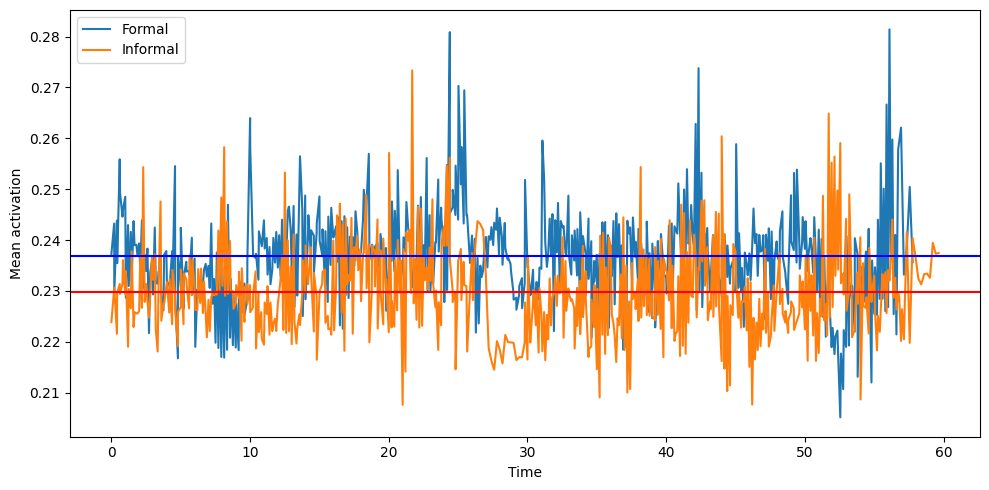

In [ ]:
# Comparing the formal and informal speech in terms of the mean activation of the action units

def mean_activation(df):
    mean = df.groupby('time')['value'].mean().reset_index()
    return mean

formal_mean = mean_activation(formal)
informal_mean = mean_activation(informal)

display(formal_mean.head())
display(informal_mean.head())

# Plotting the mean activation of the action units for formal and informal speech
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(formal_mean['time'], formal_mean['value'], label='Formal')
ax.plot(informal_mean['time'], informal_mean['value'], label='Informal')
ax.axhline(np.nanmean(formal_mean['value']), color='b')
ax.axhline(np.nanmean(informal_mean['value']), color='r')

ax.set_xlabel('Time')
ax.set_ylabel('Mean activation')
ax.legend()

fig.tight_layout()

plt.show()
